***
# Temoor Tanveer

# Final Project: A Query Answering Machine for Predicting Strokes (Data Preparation)

## Goal: Prepare the data properly so that it may be useful to feed to the different classifying algorithms.

This notebook will be used to document four stages of data preparation:

Stage 1: Data collection

Stage 2: Data Analysis (EDA)

Stage 3: Data Wrangling

Stage 4: Feature Engineering

***

## Stage 1: Data collection

This notebook will rely on the already collected dataset from Kaggle. 

Source : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Credits: User fedesoriano on Kaggle

## Stage 2: Data Analysis (EDA)

We will start by importing all the basic modules and loading the dataset into a pandas DataFrame

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("healthcare-dataset-stroke-data.csv")

We will now get some basic information regarding the dataset

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


__Some Obersvations__ :The dataset seems to have 5110 rows, making it large enough for a reasonable classifier. It has around 10 features that can prove useful for us. It also has an id column which we may consider deleting or tranforming into the row index. 

In [3]:
print(data["stroke"].unique)

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64>


The data seems to have two classes, which makes sense.

Let us now take a brief look at the dataset itself

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


It seems that there is an id columns that we will most likely not need, we will change it to the row index for the sake of simplicity and in case we need to identify for whatever reason later on. Furthermore, id the column is followed by 10 features column and a target column. We will also store those into different variables.

In [5]:
# deletes the index column
del data["id"]

# stores the features in data_f
# and the targets in data_t
data_f = data.iloc[:, 0:10]
data_t = data.iloc[:, 10]


We will now take a look at how many null entries there are within the dataset

In [6]:
total_nan = np.sum(np.sum(data.isnull()))
print(np.sum(data.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Total non-numeric entries: 201


Only the bmi columns has null entries and the rest have none. This is a relatively good amount of null entries. We will look into dealing with the bmi column later in the notebook.

For now, let us look at some statistics related to the somewhat continous features

In [7]:
data_f.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237
std,22.612647,0.296607,0.226063,45.283560,7.854067
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.500000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


The most obvious observation here would be the need for scaling, as the features seem to have a variety of different ranges.

Let us now plot the distribution of the target to see how evenly distributed the two classes are.

Text(0, 0.5, 'Frequency')

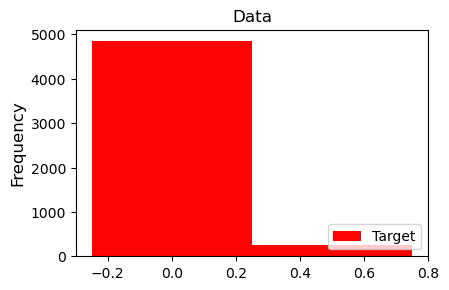

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 100 # set the resolution to x dpi


# number of data is two as there are only two classes
nbins = 2
# create a figure, that will host two suplots
fig = plt.figure(figsize=(10,3))
#     # add subplot 1 in a 1x2 plot matrix
subplot = fig.add_subplot(121, title = 'Data')
subplot.hist(data_t, nbins, density=False, color="red",
              label='Target', alpha=0.99, align = "left")
subplot.legend(loc='lower right')
subplot.set_ylabel("Frequency", fontsize = 12)

It seems the number of individuals that have been classified as stroke-free far outweigh the number of peole that haven't.


In [9]:
print("Number of individuals with stroke: " + str(data_t.sum()))
print("Number of individuals without a stroke: " + str(data_t.size - data_t.sum()))

Number of individuals with stroke: 249
Number of individuals without a stroke: 4861


We will not move to look at the distribution of the features we have, 

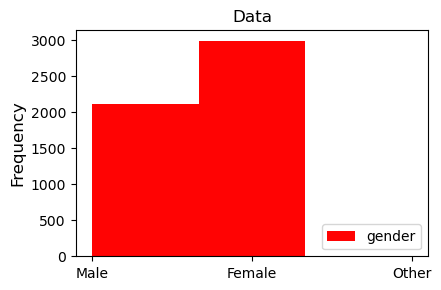

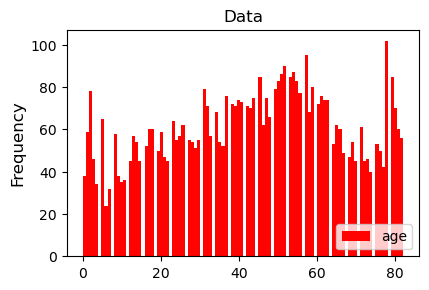

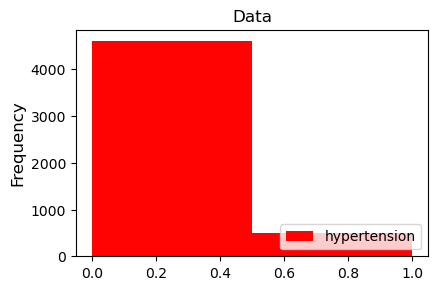

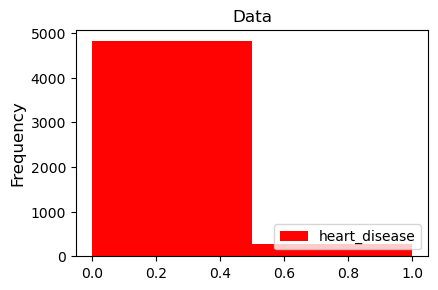

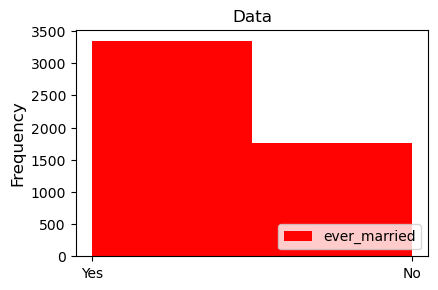

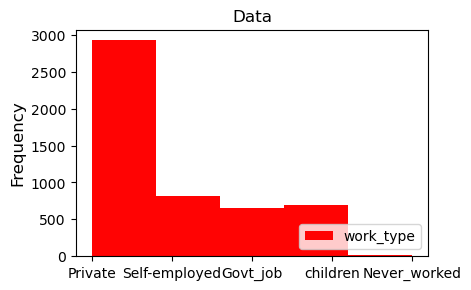

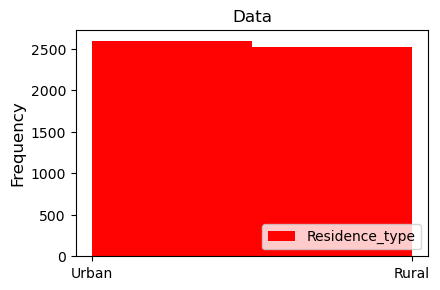

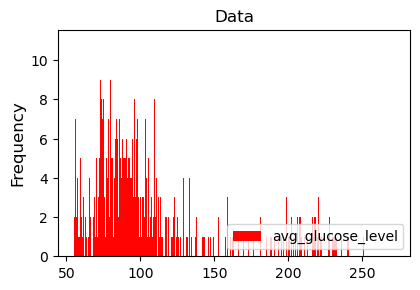

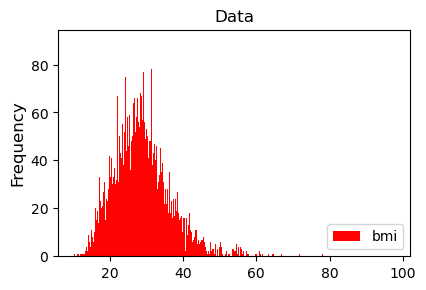

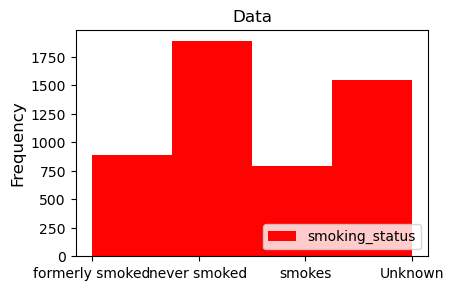

In [10]:
for i in data_f:
    # number of data and number of bins for the histograms
    # by using nunique, we are making the features with discrete answers
    # a lot more readable.
    # Source : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html
    nbins = data_f[i].nunique()
    # create a figure, that will host two suplots
    fig = plt.figure(figsize=(10,3))
#     # add subplot 1 in a 1x2 plot matrix
    subplot = fig.add_subplot(121, title = 'Data')
    subplot.hist(data_f[i], nbins, density=False, color="red",
                  label='{}'.format(i), alpha=0.99)
    subplot.legend(loc='lower right')
    subplot.set_ylabel("Frequency", fontsize = 12)

Features with an __even and mostly good distribution__ are: residence type, gender, age and smoking status

Features with __uniform distribution__ are: average glucose level(left-skewed) and bmi(left-skewed)

Features with __less than optimal distribution__ are: heart disease, hypertension, work type and ever married

### We will now move to some EDA related to how the features are correlated

We will start by using seaborn to see how the data relates to each other. Furthermore, we will also include the targets in this part as we want to see it's relation with the features too.

Before we do that properly, it seems we will also have to transform the features with discrete answers into numbers, so it may be easier to plot

In [11]:
# Source : https://pbpython.com/categorical-encoding.html

data["gender"] = data["gender"].astype('category')
data["gender"] = data["gender"].cat.codes

data["ever_married"] = data["ever_married"].astype('category')
data["ever_married"] = data["ever_married"].cat.codes

data["work_type"] = data["work_type"].astype('category')
data["work_type"] = data["work_type"].cat.codes

data["Residence_type"] = data["Residence_type"].astype('category')
data["Residence_type"] = data["Residence_type"].cat.codes

data["smoking_status"] = data["smoking_status"].astype('category')
data["smoking_status"] = data["smoking_status"].cat.codes

data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


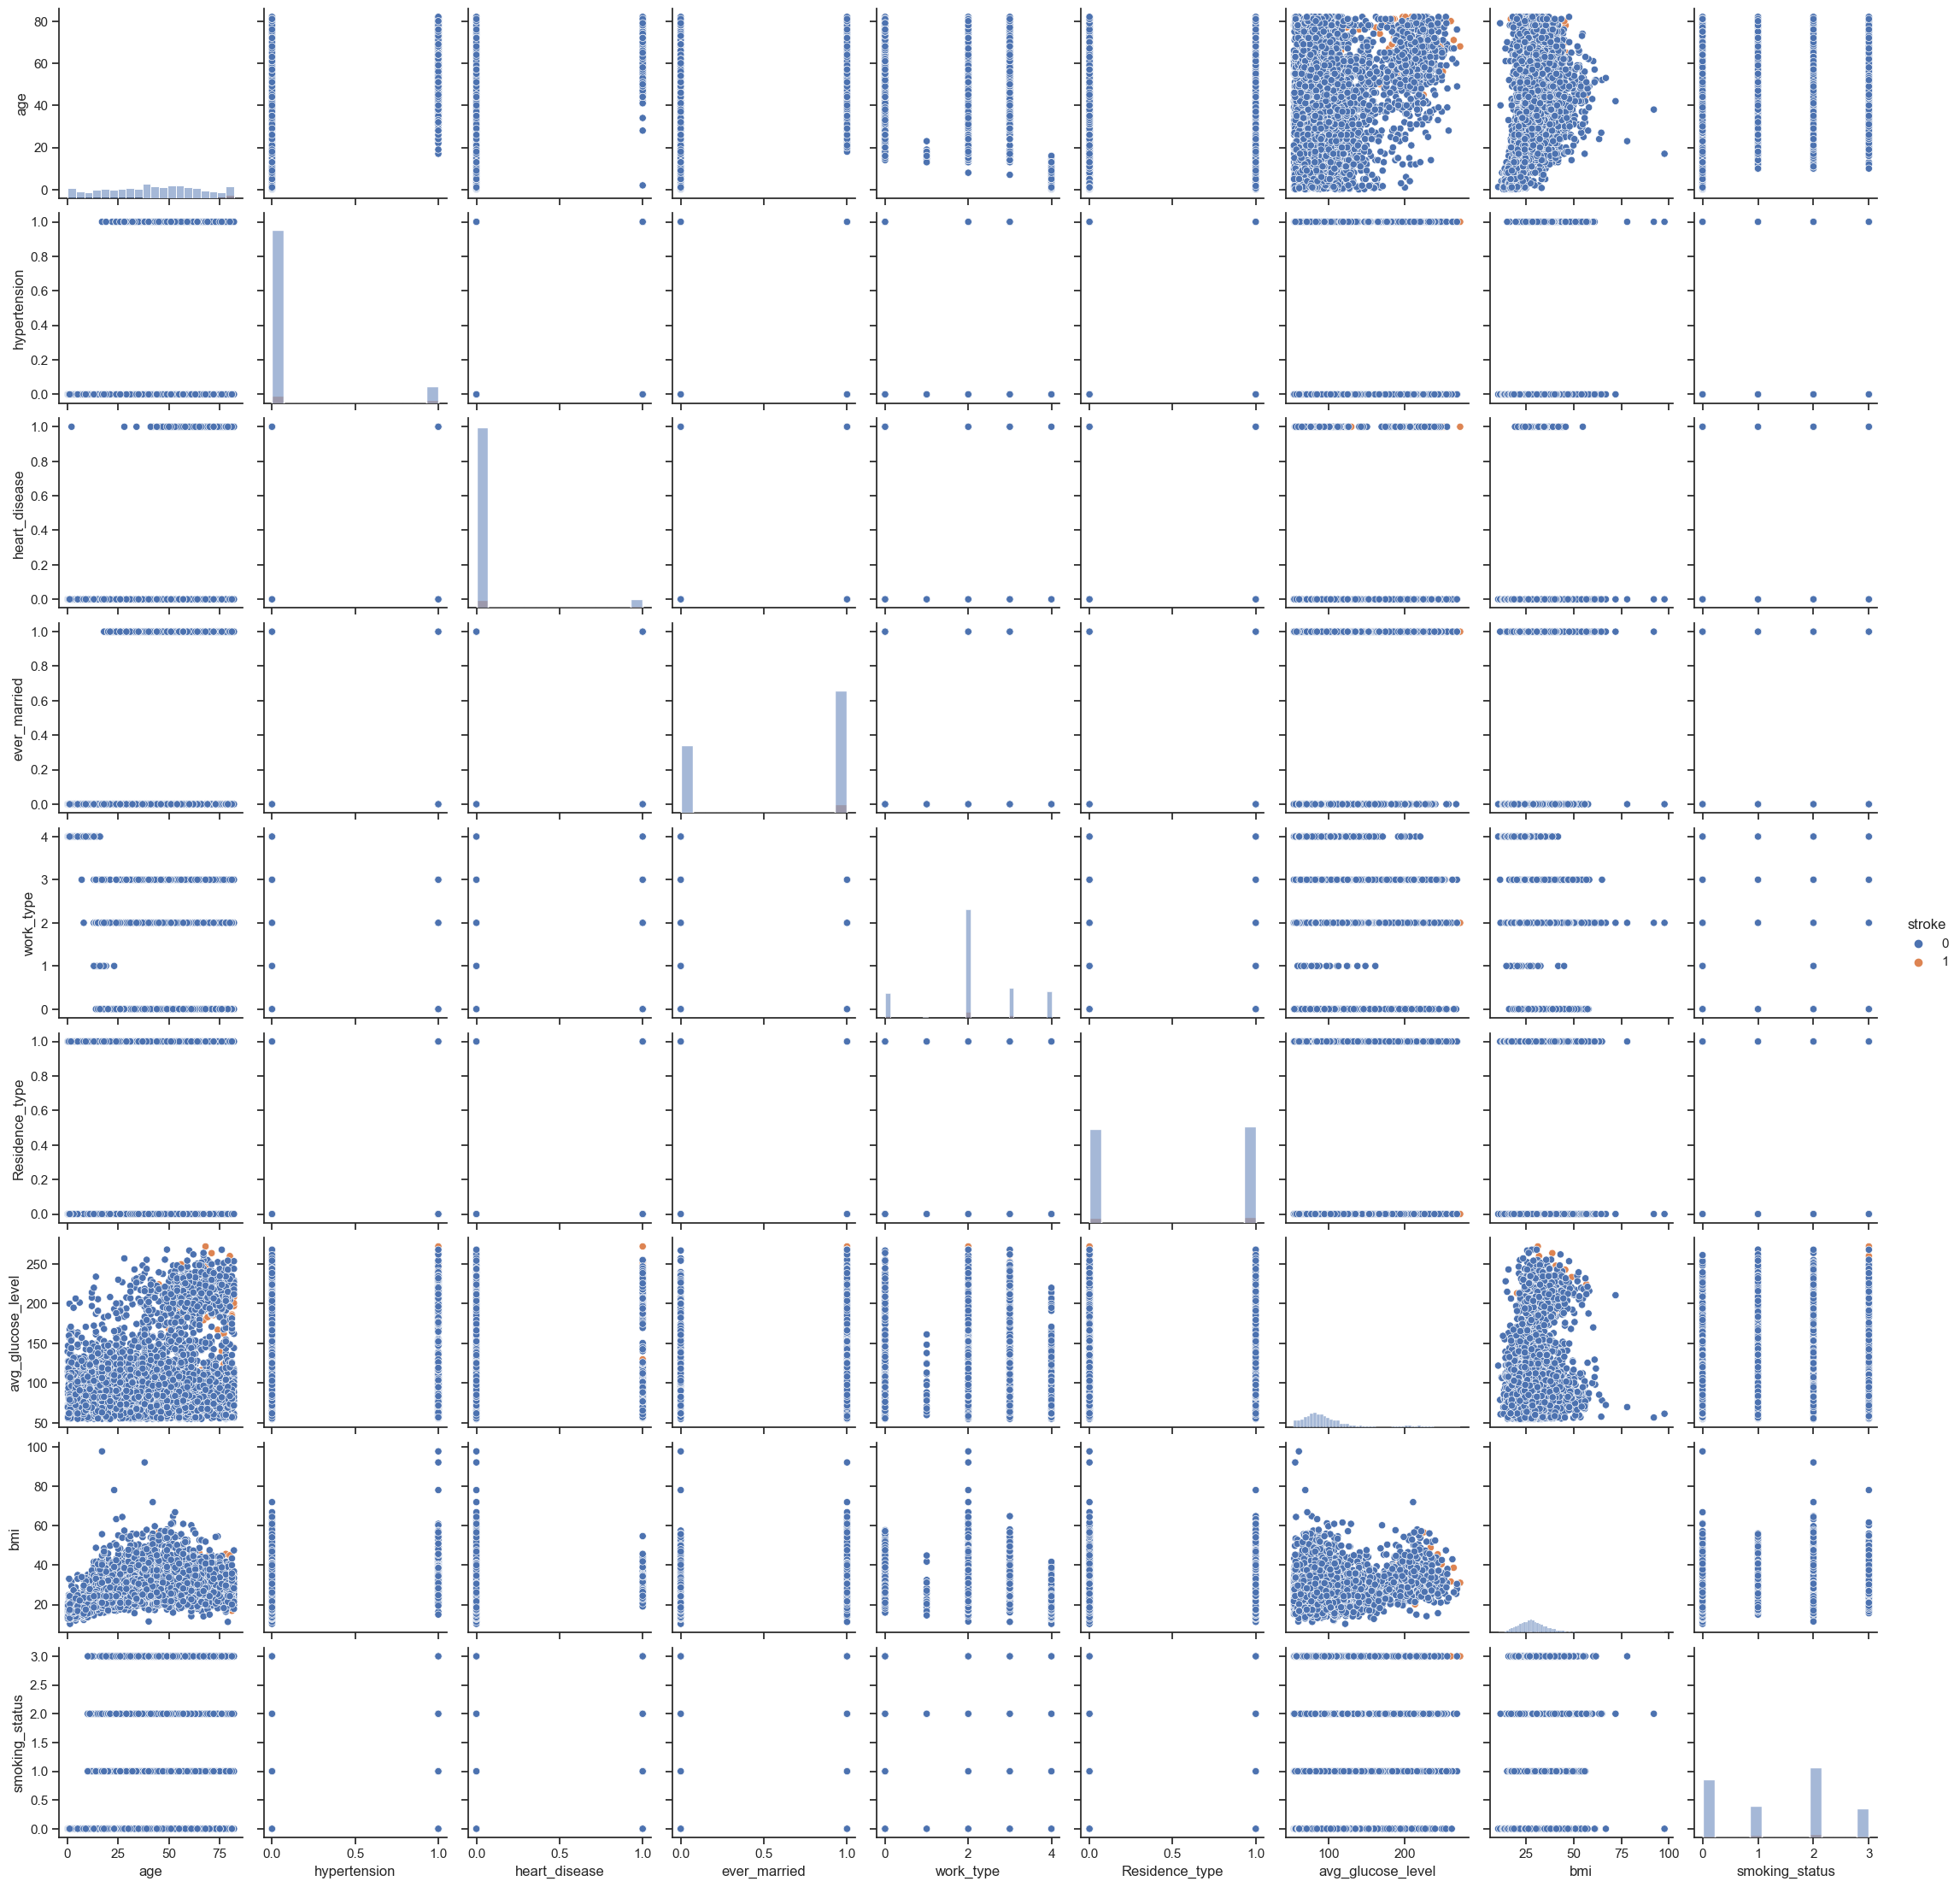

In [12]:
import seaborn as sb


sb.set(style="ticks", color_codes=True)

# to not inlude the ids
g = sb.pairplot(data.iloc[:, 1:], hue="stroke", diag_kind='hist')


Plotting this way yields little information, so we can try plotting the the non-categorical features only.

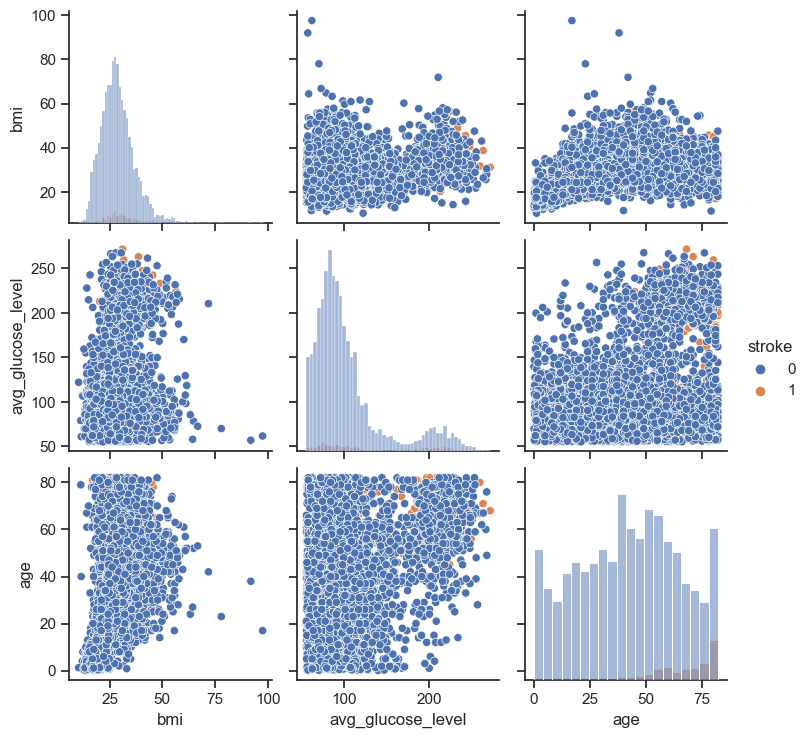

In [13]:
import seaborn as sb


sb.set(style="ticks", color_codes=True)

g = sb.pairplot(data[["stroke", "bmi", "avg_glucose_level", "age"]], hue="stroke", diag_kind='hist')

From the above plotting, it can be said that most features are too tangled. But avg_glucose_level x bmi may be a good candidate. 

Will now move to plotting this feature in a 3d plane

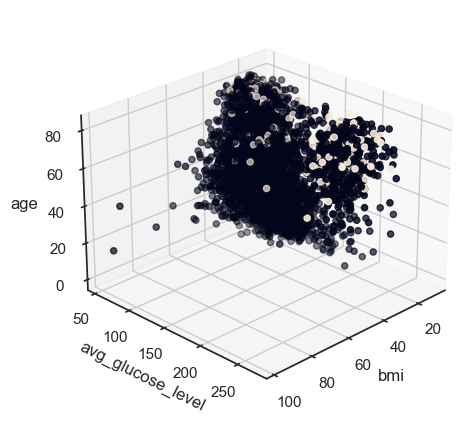

In [14]:
feature_1 = data["bmi"]
feature_2 = data["avg_glucose_level"]
feature_3 = data["age"]

target = data["stroke"]

from mpl_toolkits.mplot3d import Axes3D
plot3d = Axes3D ( plt.figure ()) # get handler for a 3d figure plot
# the view point , elevation and azimuth angles
plot3d.view_init ( elev =25. , azim =45)
plot3d.set_xlabel ('bmi')
plot3d.set_ylabel ('avg_glucose_level')
plot3d.set_zlabel ('age')

plot3d.scatter3D (feature_1, feature_2, feature_3 , c=target ,)

Once again, it seems that it will be hard classify using the raw data and the need for scaling is clear. It may be noted however that the above features could potentially end up being useful as at bmi range 0-40 and age 40-80 we can see the majority of stroke victims

## Step 3: Data Wrangling

We will start by dealing with the null values. In this case we only have a single feature that has null values, which is bmi. At this point it makes most sense to replace the null values with the median of that feature as from our distribution plot it is clear that it has a uniform distrbitution.

In [15]:
data["bmi"].fillna(data["bmi"].median(), inplace = True)
data_f["bmi"].fillna(data_f["bmi"].median(), inplace = True)

Just to be sure:

In [16]:
total_nan = np.sum(np.sum(data.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

total_nan = np.sum(np.sum(data_f.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

Total non-numeric entries: 0
Total non-numeric entries: 0


Before we move to scaling we will have to turn categorical features into nubmers, a bit similar to what we did in a previous cell. In this case however we will also be changing our features-only dataset(data_f). Note: we will not be using this method on features that only have binary results in our dataset.

In [17]:
gender = pd.get_dummies(data_f["gender"], prefix = "gender")

married = pd.get_dummies(data_f["ever_married"], prefix = "ever_married")

work = pd.get_dummies(data_f["work_type"], prefix = "work_type")

res = pd.get_dummies(data_f["Residence_type"], prefix = "Residence_type")

smoking = pd.get_dummies(data_f["smoking_status"], prefix = "smoking_status")

data_new = data_f.drop(["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis = 1)

data_fc = pd.concat([data_new, gender, married, work, res, smoking], axis = 1)

data_fc.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

Now we will move to scaling as the previous cells(like the .describe() one) have made it clear that it is essential. We would have chosen a simple z-standarization scaling by occam's razor, but from the distribution graphs it seems that there are some outliers as well. To deal with that we will use the Robust Scaler.

In [18]:
from sklearn import preprocessing
import numpy as np

# get the scaler object
rs_scaler = preprocessing.RobustScaler()

# apply the scaler to the data
data_fs = rs_scaler.fit_transform(data_fc)


After getting the scaled features, let us now store them into a dataframe so it may be more organized.

In [19]:
data_fsd = pd.DataFrame(data_fs, columns = data_fc.columns)
data_fsd

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.611111,0.0,1.0,3.712987,0.944444,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.444444,0.0,0.0,2.994300,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
2,0.972222,0.0,1.0,0.380920,0.488889,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
3,0.111111,0.0,0.0,2.153481,0.700000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.944444,1.0,0.0,2.231917,-0.455556,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.972222,1.0,0.0,-0.220790,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5106,1.000000,0.0,0.0,0.904193,1.322222,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5107,-0.277778,0.0,0.0,-0.241417,0.277778,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
5108,0.166667,0.0,0.0,2.019406,-0.277778,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0


## Step 4: Feature Extraction

We will now move to extract the most relevant features, so features with low correlation with the target aren't included. Furthermore we may extract new useful features from the older ones.

We will start by plotting a correlation matrix to see how the different features in our dataset are correlated

<AxesSubplot:>

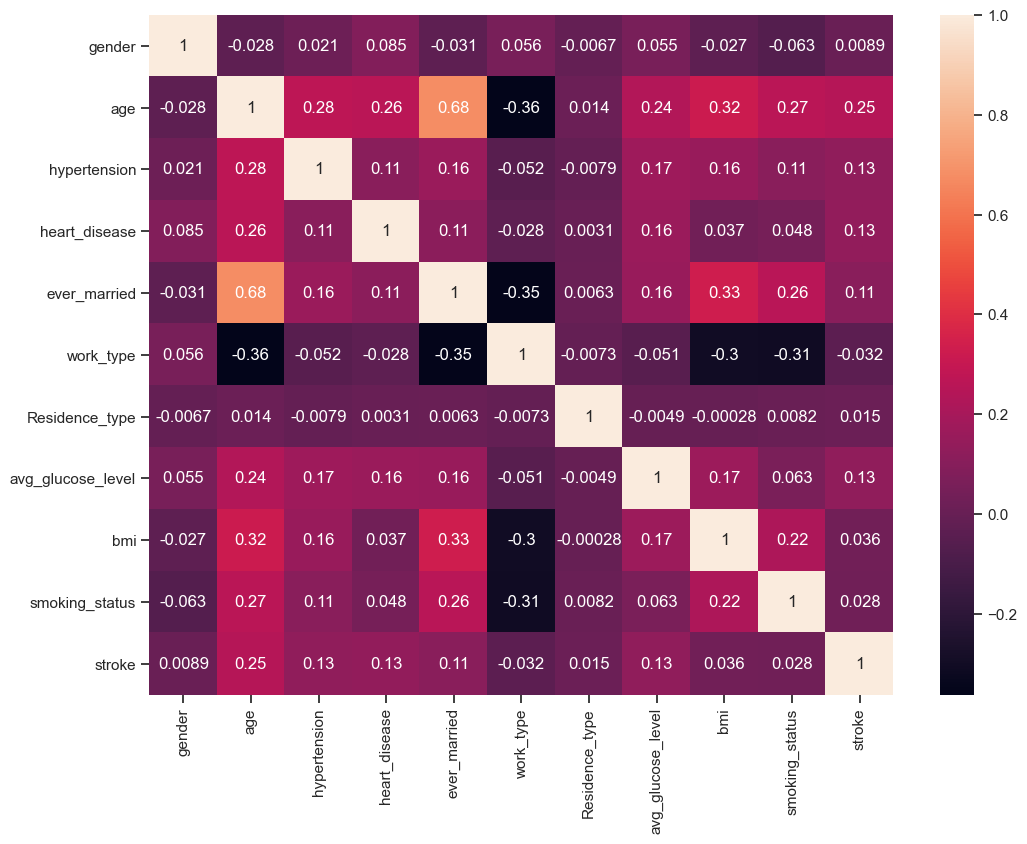

In [20]:
import seaborn as sb


corr = data.corr()
corr

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 100 # set the resolution to x dpi

plt.figure(figsize = (12,9))

sb.heatmap(corr, 
             xticklabels=corr.columns, 
             yticklabels=corr.columns, annot = True)

From a first look it seems that there aren't really any features that are too directly related to out target set.For now,  avgerage glucose level seems to be the best bet. 

Furthermore, we can also see that there aren't really any features that are too correlated with others, ever married and age seem to be the only two. Due to their relatively high correlation with the target we will keep both. Another reason we are straying away from deleting many features for now is because we will also look at the polynomial tranformed ones, which may reveal some more correlations

We will at this point delete the gender feature due to its relatively high low correlation. 

In [21]:
del data_fsd["gender_Male"]
del data_fsd["gender_Other"]
del data_fsd["gender_Female"]

In [22]:
data_fsd

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.611111,0.0,1.0,3.712987,0.944444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.444444,0.0,0.0,2.994300,0.000000,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
2,0.972222,0.0,1.0,0.380920,0.488889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
3,0.111111,0.0,0.0,2.153481,0.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.944444,1.0,0.0,2.231917,-0.455556,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.972222,1.0,0.0,-0.220790,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5106,1.000000,0.0,0.0,0.904193,1.322222,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5107,-0.277778,0.0,0.0,-0.241417,0.277778,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
5108,0.166667,0.0,0.0,2.019406,-0.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0


Let us now use polynomial transformation to transform our data so that we can reveal some correlation that may arise from the features interacting with each other. 

We will stick to degree 2 for this try.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
data_fsd_poly = poly.fit_transform(data_fsd)

poly_features = pd.DataFrame(data_fsd_poly)
poly_features['stroke'] = data_t.values

poly_features

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,stroke
0,0.611111,0.0,1.0,3.712987,0.944444,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0.444444,0.0,0.0,2.994300,0.000000,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.972222,0.0,1.0,0.380920,0.488889,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.111111,0.0,0.0,2.153481,0.700000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.944444,1.0,0.0,2.231917,-0.455556,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.972222,1.0,0.0,-0.220790,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5106,1.000000,0.0,0.0,0.904193,1.322222,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5107,-0.277778,0.0,0.0,-0.241417,0.277778,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5108,0.166667,0.0,0.0,2.019406,-0.277778,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


Let us now see how correlated our newly extracted features are with the targets.

In [24]:
# Code taken from datascience exchange at :
#https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable

correlations = poly_features.corr()['stroke'][:]

correlations

0         0.245257
1         0.127904
2         0.134914
3         0.131945
4         0.036110
            ...   
185            NaN
186      -0.004129
187            NaN
188       0.008939
stroke    1.000000
Name: stroke, Length: 190, dtype: float64

From the above results we can see that the number of features with relatively high correlation with the target has increased. But there still remain some features that have very low correlation. At this stage we will remove any feature that has a correlation less than 0.05, so we may get rid of features that are not useful and may only waste computational time.

In [25]:
to_be_deleted = []

for i in range(len(poly_features.columns) - 1):
    # gets the correlation between a single feature
    x = correlations[i]
    if abs(x) < 0.05:
        to_be_deleted.append(i)


poly_features = poly_features.drop(poly_features.columns[to_be_deleted], axis=1) 
print( "We are left with :", 189 - len(to_be_deleted), "number of features")

We are left with : 102 number of features


In [26]:
data_f

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


At this stage, our data has been cleaned, scaled and the correct features have been extracted from this dataset. Let us now note here some of the most important aspects of our extracted dataset, so it may be easier for us to take a look in the future.

In [27]:
poly_features.shape

(5110, 103)

Let us store the features in a feature variable so it may be easier to move forward

In [28]:
features = poly_features.iloc[:, :-1]

We will also set the index of our target column data_t to match our features dataset

In [29]:
features

,0,1,2,3,5,6,10,11,14,15,...,163,164,179,180,181,182,183,184,185,187
0,0.611111,0.0,1.0,3.712987,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.444444,0.0,0.0,2.994300,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.972222,0.0,1.0,0.380920,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.111111,0.0,0.0,2.153481,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.944444,1.0,0.0,2.231917,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.972222,1.0,0.0,-0.220790,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5106,1.000000,0.0,0.0,0.904193,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5107,-0.277778,0.0,0.0,-0.241417,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5108,0.166667,0.0,0.0,2.019406,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


***

## Goal: Try out different models to find the best one for QuAM.

This notebook will be used to document three different iterations

__Iteration 1:__

Model 1: K-Nearest Neighbor

Model 2: Decision Trees

Model 3: Support Vector Machines

Model 4: Bagging

Model 5: Boosting

Model 6: Neurel Networks

__Iteration 2: Uses class weights to solve class imbalance__

Model 1: Decision Trees

Model 2: Support Vector Machines

Model 3: Neurel Networks

__Iteration 3: Using different techniques to produce artifically balanced classes__

Technique 1: Trying a mixture of over sampling and undersampling

Technique 2: Trying out K-means to reduce the class imbalance

Technique 3: Trying out manually bootstrapped datasets

***

## Iteration 1: 
In this iteration we will try out a few different models to see how we well we can classify using them.

### Using K-NN Classifier

We will start by using a simple k-NN classifier, as it is simple and can yield good results for classifying.

We will start by importing the necessary modules and functions

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import f1_score

def learn_kNN_classifier(features_data, targets, neighbors, voting):
    '''Set up a K-NN classifier and fits it to the given training data.
       Return: learned classifier.''' 
    
    classifier = KNeighborsClassifier(n_neighbors=neighbors, 
                                      weights=voting)
    classifier.fit(features_data, targets)
    
    return classifier


def get_predictions(test_data, targets, classifier):
    '''Input: trained classifier, test set for feature data paired with target values.
       Return: prediction labels and the mean accuracy over the test set.'''
    
    Y_prediction = classifier.predict(test_data)
    
    accuracy = metrics.accuracy_score(targets, Y_prediction)
    
    return (Y_prediction, accuracy)

For our K-NN classifier we will reuse a function from homework 1 to decide which parameters would yield the most accurate results. It will try out 15 different weights and at the end we will decide which one is the most useful one.

In [31]:
from sklearn.model_selection import cross_validate


kNN_models = list(range(1, 11))

# Will be used later for making boxplots:
cv_data = []

for i in kNN_models:

    classifier = learn_kNN_classifier(features, data_t, 
                                          i, "uniform")
    predictions, accuracy = get_predictions(features, 
                                                data_t, 
                                                classifier)
    
    cv_results = cross_validate(classifier, features, data_t, cv=10, 
                            return_train_score=True)
    
    cv_data.append(cv_results["test_score"])
#     print("Number of stroke patients detected: " + str(predictions.sum()))
#     print("Number of total stroke patients: " + str(data_t.sum()))
    print("f1 test score: " + str(f1_score(data_t, predictions)))
    

    print('Mean test score: {:.3f} (std: {:.3f}) for {} k-NN model'
      '\nMean train score: {:.3f} (std: {:.3f}) \n'.format(
                                              np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']), i,
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

f1 test score: 1.0
Mean test score: 0.915 (std: 0.008) for 1 k-NN model
Mean train score: 1.000 (std: 0.000) 

f1 test score: 0.2402826855123675
Mean test score: 0.948 (std: 0.003) for 2 k-NN model
Mean train score: 0.958 (std: 0.001) 

f1 test score: 0.37611940298507457
Mean test score: 0.942 (std: 0.005) for 3 k-NN model
Mean train score: 0.959 (std: 0.001) 

f1 test score: 0.11194029850746269
Mean test score: 0.950 (std: 0.002) for 4 k-NN model
Mean train score: 0.953 (std: 0.001) 

f1 test score: 0.15547703180212016
Mean test score: 0.948 (std: 0.002) for 5 k-NN model
Mean train score: 0.953 (std: 0.001) 

f1 test score: 0.0390625
Mean test score: 0.951 (std: 0.001) for 6 k-NN model
Mean train score: 0.952 (std: 0.000) 

f1 test score: 0.05405405405405405
Mean test score: 0.950 (std: 0.002) for 7 k-NN model
Mean train score: 0.952 (std: 0.000) 

f1 test score: 0.007936507936507936
Mean test score: 0.951 (std: 0.001) for 8 k-NN model
Mean train score: 0.951 (std: 0.000) 

f1 test sc

We will now use boxplot to get a general idea of what our best weights could be

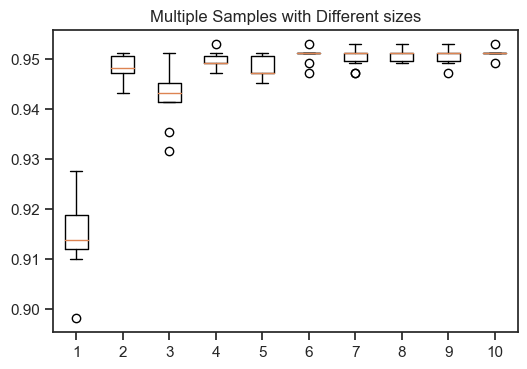

In [32]:

fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(cv_data)

plt.show()


From the above results we can reasonably conclude that k = 3 is the best candidate as it not only has a high test score, its train score is reasonable (to avoid overfitting), and its f1 score is relatively good. It should be noted however that this number is still very low.

Let us plot its confusion matrix to get a better idea.

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def show_confusion_matrix(true_labels, learned_labels, class_names):

    cmat = confusion_matrix(true_labels, learned_labels) 

    plt.figure(figsize=(15, 3.5))

    plt.tick_params(labelsize=8)

    
    hm = sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=True,
                     xticklabels=class_names,
                     yticklabels=class_names, 
                     cmap="seismic", 
                     annot_kws={"size":12}, cbar_kws={'label': 'Counts'})

    # this is to set the last axis of the figure, the colorbar in this case
    hm.figure.axes[-1].yaxis.label.set_size(10) # fontsize of bar label
    hm.figure.axes[-1].tick_params(labelsize=8) # fontsize of ticks labels
    
    #plt.ylim(10, 0)

    plt.xlabel('True label', fontsize=9)
    plt.ylabel('Predicted label', fontsize=9)
    
    plt.show()

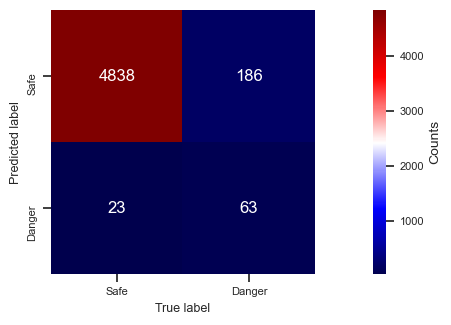

In [34]:
classifier = learn_kNN_classifier(features, data_t, 
                                          3, "uniform")
predictions, accuracy = get_predictions(features, data_t, classifier)  

show_confusion_matrix(data_t, predictions, ['Safe', 'Danger'])

The matrix above shows just how bad our best k-NN classifier really is. We will have to try out other models and see their performace.

### Using decision trees

We will begin by importing the necessary modules

In [35]:
from sklearn import tree

And now split the dataset into training and testing

In [36]:
from sklearn.model_selection import train_test_split 

#split dataset in features and target variable / train & test
#
X_train, X_test, Y_train, Y_test = train_test_split(features, data_t,  
                                                    test_size=0.25, random_state=52) 

We will be using entropy as our criterion as we would like to have maximum gain after each expansion of nodes. Furthermore, the max_depth will left as none by default, which should lead to the nodes expanding as much as possible, we will try out other parameters later on.

In [37]:
# Create Decision Tree classifer object

dt_classifier = tree.DecisionTreeClassifier( criterion = "entropy")

dt = dt_classifier.fit(X_train, Y_train)

Let us now check how well our decision tree classifier performs.

In [38]:
#Predict the response for train dataset
Y_pred_train = dt_classifier.predict(X_train)

accuracy = metrics.accuracy_score(Y_train, Y_pred_train)
print('Accuracy on training: {:.2f}'.format(accuracy))

#Predict the response for test dataset
Y_pred = dt_classifier.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy on testing: {:.2f}'.format(accuracy))

print("f1 score : " + str(f1_score(Y_test, Y_pred)))

Accuracy on training: 1.00
Accuracy on testing: 0.91
f1 score : 0.14492753623188406


Even though our model has a decent accuracy score, a low f1 score still means our model is struggling.

We would now like a visual representation of the above results.

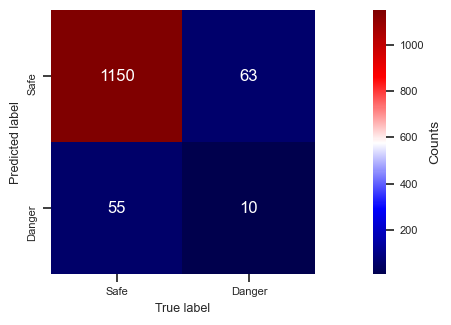

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def show_confusion_matrix(true_labels, learned_labels, class_names):

    cmat = confusion_matrix(true_labels, learned_labels) 

    plt.figure(figsize=(15, 3.5))

    plt.tick_params(labelsize=8)

    
    hm = sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=True,
                     xticklabels=class_names,
                     yticklabels=class_names, 
                     cmap="seismic", 
                     annot_kws={"size":12}, cbar_kws={'label': 'Counts'})

    # this is to set the last axis of the figure, the colorbar in this case
    hm.figure.axes[-1].yaxis.label.set_size(10) # fontsize of bar label
    hm.figure.axes[-1].tick_params(labelsize=8) # fontsize of ticks labels
    
    #plt.ylim(10, 0)

    plt.xlabel('True label', fontsize=9)
    plt.ylabel('Predicted label', fontsize=9)
    
    plt.show()
    
show_confusion_matrix(Y_test, Y_pred, ['Safe', 'Danger'])

As mentioned above, our model is still a very bad classifier, especially if we look at the number of within stroke risk patients it misclassified.

Let us now try out a few more more parameters for the tree to see which one is the best one.

In [40]:

def visualize_decision_tree(dt, feature_names=None, class_names=None,
                            title='', axis = None, 
                            size = (10,12), facecolor='black'):
    '''Visualize a given decision tree.
       If axis is None, the title, size, and facecolor parameters are used.
       If axis is different from None, it is a subplot is some mosaic of plots.
       In this case title, size, and facecolor are controlled by the calling function.
    '''
    
    if axis == None:
        fig = plt.figure(figsize=size)

        fig.patch.set_facecolor(facecolor)
        fig.patch.set_alpha(0.5)
        
        tree.plot_tree(dt, feature_names=feature_names, class_names=class_names,
                       rounded=True, filled=True, node_ids=True)
        
        plt.title(title, color='w', fontsize=15)
        plt.show()
        
    else:
        tree.plot_tree(dt, feature_names=feature_names, class_names=class_names,
                       rounded=True, filled=True, node_ids=True,
                       ax= axis)

def train_and_show_multiple_decision_trees(X, Y, X_test, Y_test,
                                           parameters = {}, 
                                           feature_names = None, class_names = None, 
                                           ncols = 3, 
                                           size = (10,12), facecolor='black', 
                                           rnd_seed=None):
    '''Show a matrix of decision trees based on the given list of parameters values.
    parameters is a dictionary with one string key, that can be one of the following
    DT parameters: criterion, max_depth, max_leaf_nodes. The value associated to the key
    is a list of values for the parameter.
    '''
    
    fig = plt.figure(figsize=size) 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.15) 
    
    n_plots = len(list(parameters.values())[0])
    
    nrows = int(np.ceil(n_plots / ncols))
    
    if 'criterion' not in parameters:
        criterion = 'entropy'
    
    for i,p in enumerate(list(parameters.values())[0]):
        # create the DT object based on the input parameters
        
        if 'max_depth' in parameters:
            decision_tree = tree.DecisionTreeClassifier(criterion=criterion, 
                                                        max_depth=p, 
                                                        random_state=rnd_seed)
            
            title = 'DT ({}, {}={})'.format(criterion, 'max_depth', p)
            
        elif 'max_leaf_nodes' in parameters:
            decision_tree = tree.DecisionTreeClassifier(criterion=criterion, 
                                                        max_leaf_nodes=p,
                                                       random_state=rnd_seed)
             
            title = 'DT ({}, {}={})'.format(criterion, 'max_leaf_nodes', p)
            
        elif 'criterion' in parameters:
            decision_tree = tree.DecisionTreeClassifier(criterion=p, 
                                                        random_state=rnd_seed)
            title = 'DT ({})'.format(p)
        
        # train the classifier and check its performance 
        dt_classifier = decision_tree.fit(X, Y)
        
        Y_pred = dt_classifier.predict(X_test)
        accuracy_test = metrics.accuracy_score(Y_test, Y_pred)
        
        f1 = f1_score(Y_test, Y_pred)
        
        Y_pred = dt_classifier.predict(X_train)
        accuracy_train = metrics.accuracy_score(Y_train, Y_pred)
        
        
        title += ' Accuracy: {:.2f} ({:.2f}) f1 : {}'.format(accuracy_test, accuracy_train, f1)
        
        subplot = fig.add_subplot(nrows, ncols, i+1) 
        
        visualize_decision_tree(dt_classifier, 
                                feature_names=feature_names, 
                                class_names=class_names,
                                title=title,
                                size=size, facecolor=facecolor, axis = subplot)
        
        # all these sets must be done after the tree plot has been created
        subplot.set_title(title, color='black', fontsize=8)
        subplot.axis('on')
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_facecolor('gray')
        subplot.patch.set_alpha(0.5)
        
    plt.show()

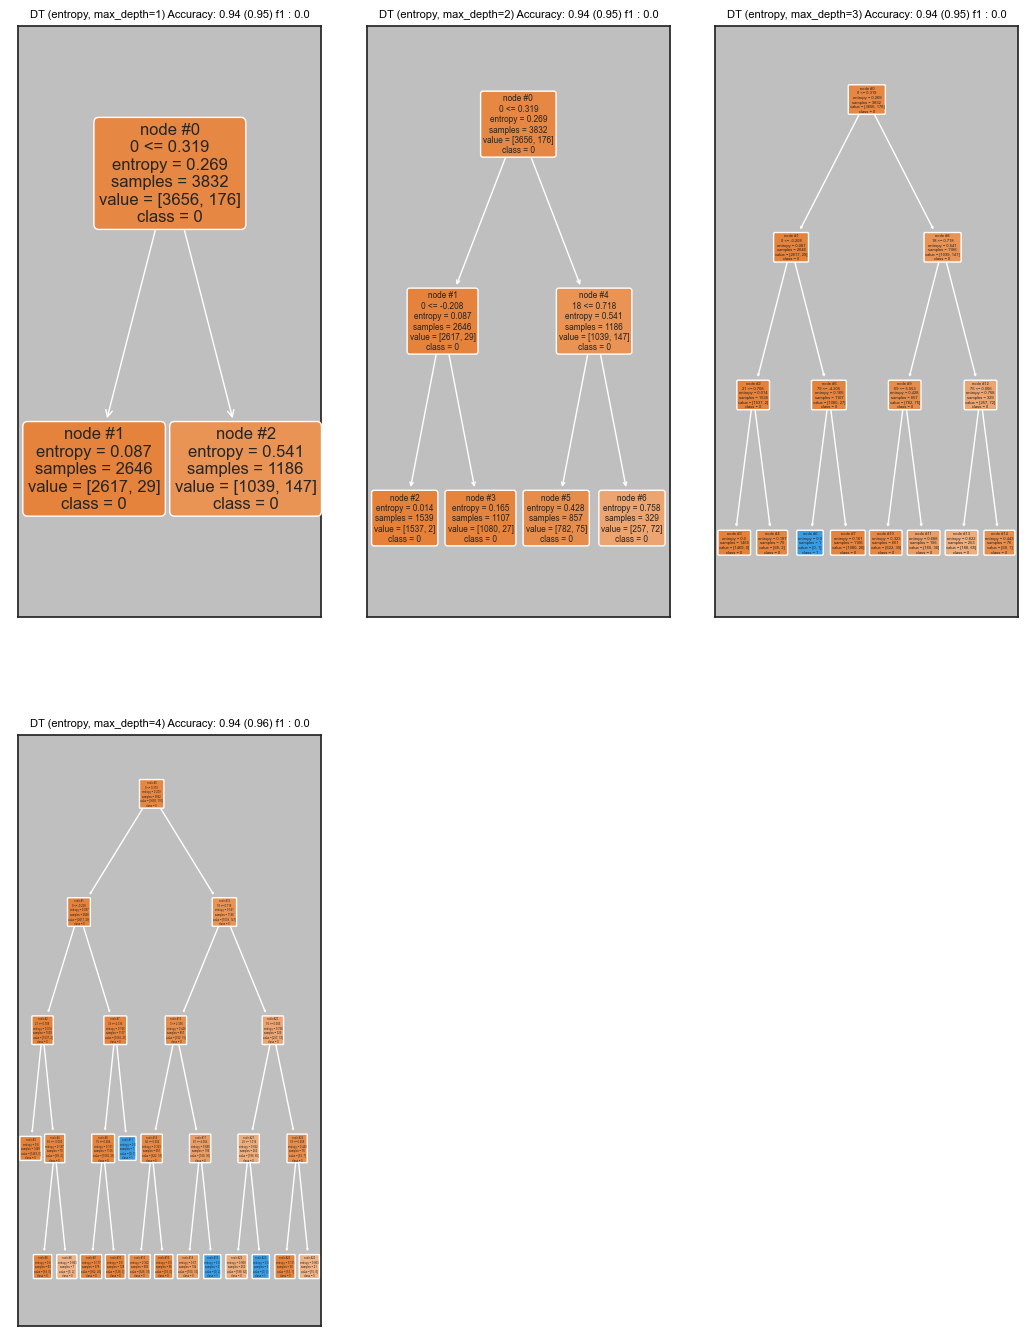

In [41]:
train_and_show_multiple_decision_trees(X_train, Y_train, X_test, Y_test, 
                                       {'max_depth': [1,2,3,4,]},
                                       feature_names=poly_features.columns, 
                                       class_names=["0","1"],
                                       ncols=3, 
                                       size=(10,13), 
                                       rnd_seed=99)

The results above lead us to believe that a decision tree also fails as a good contender for our model as its f1 score is extremely low. Furthermore, trying out different parameters wil most likely not help as currently, the f1 score seems to be too low.

### Using Support Vector Machines

For the SVMS we will try out different kernels to see which one best suits our needs.

We start with a linear kernel.

In [42]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = svm_clf.predict(X_test)

Let us now look at the accuracy of our model.

In [43]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

print("f1 score : " + str(f1_score(Y_test, Y_pred)))

Accuracy SVM: 0.943
f1 score : 0.0


The accuracy seems to be clearly low as our data isn't linearly seperable, let us try some other kernels.

In [44]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='rbf') # Radial Basis Function Kernel

#Train the model using the training sets
svm_clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = svm_clf.predict(X_test)

Let us now look at the accuracy of our model.

In [45]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

print("f1 score : " + str(f1_score(Y_test, Y_pred)))

Accuracy SVM: 0.943
f1 score : 0.0


It seems that problem still persists and our data wasn't seperable using an rbf kernel either. Let us try a sigmoid one next, though not much is expected.

In [46]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='sigmoid') # Sigmoid Kernel

#Train the model using the training sets
svm_clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = svm_clf.predict(X_test)

In [47]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

print("f1 score : " + str(f1_score(Y_test, Y_pred)))

Accuracy SVM: 0.912
f1 score : 0.12403100775193798


The sigmoid kernel led to a higher f1 score than the rest, but the score still seems to be very low.

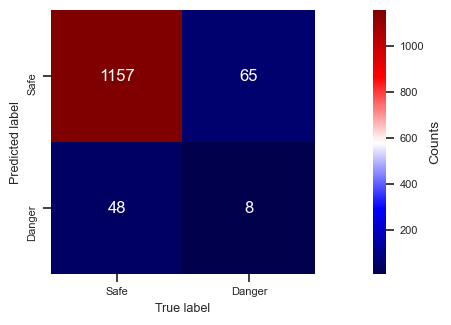

In [48]:
show_confusion_matrix(Y_test, Y_pred, ['Safe', 'Danger'])

It seems the result was a bit better using the sigmoid kernel but clearly, this is not enough. Let us now try a polynomial kernel with 10 degrees and see the results we get.

In [49]:
#Import svm model
from sklearn import svm

for i in range(2, 11):
    #Create a svm Classifier
    svm_clf = svm.SVC(kernel='poly', degree = i) # Linear Kernel

    #Train the model using the training sets
    svm_clf.fit(X_train, Y_train)

    #Predict the response for test dataset
    Y_pred = svm_clf.predict(X_test)
    
    # Model Accuracy: how often is the classifier correct?
    print("f1 score for {} degree: {}".format(i , str(f1_score(Y_test, Y_pred))))
    print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

f1 score for 2 degree: 0.02531645569620253
Accuracy SVM: 0.940
f1 score for 3 degree: 0.06818181818181818
Accuracy SVM: 0.936
f1 score for 4 degree: 0.0425531914893617
Accuracy SVM: 0.930
f1 score for 5 degree: 0.058252427184466014
Accuracy SVM: 0.924
f1 score for 6 degree: 0.09345794392523364
Accuracy SVM: 0.924
f1 score for 7 degree: 0.07547169811320754
Accuracy SVM: 0.923
f1 score for 8 degree: 0.05555555555555555
Accuracy SVM: 0.920
f1 score for 9 degree: 0.07920792079207921
Accuracy SVM: 0.927
f1 score for 10 degree: 0.09803921568627451
Accuracy SVM: 0.928


It seems that so far SVC with a sigmoid kernel has proven most fruitful, but it still falls short of being a good classifier. The large number of stroke-free patients seem to keep affecting our model.

### Boosting

For this stage we will try out boosting on our datset. We will be using the default basic one node tree classifier for this try, as we are more interested in the boosting itself.

In [50]:
from sklearn.ensemble import AdaBoostClassifier


classifier = AdaBoostClassifier()

#Train the model using the training sets
classifier.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = classifier.predict(X_test)

In [51]:
# Model Accuracy: how often is the classifier correct?
print('Accuracy AdaBoost: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))
print("f1 score : " + str(f1_score(Y_test, Y_pred)))

Accuracy AdaBoost: 0.938
f1 score : 0.11235955056179775


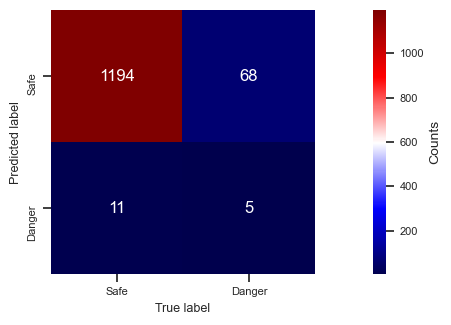

In [52]:
show_confusion_matrix(Y_test, Y_pred, ['Safe', 'Danger'])

It is clear from the above that our models are still struggling to get a good classification of stroke-risk patients.

Let us try one last model for this iteration.
### Using bagging classifier with a support vector machine

For this  we will use the sigmoid kernel as we found to be relatively high in its results.

In [53]:
from sklearn.ensemble import BaggingClassifier


classifier = BaggingClassifier(base_estimator=svm.SVC(kernel='sigmoid'))

#Train the model using the training sets
classifier.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = classifier.predict(X_test)

In [54]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print('Accuracy Bagging: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

print("f1 score : " + str(f1_score(Y_test, Y_pred)))

Accuracy Bagging: 0.914
f1 score : 0.126984126984127


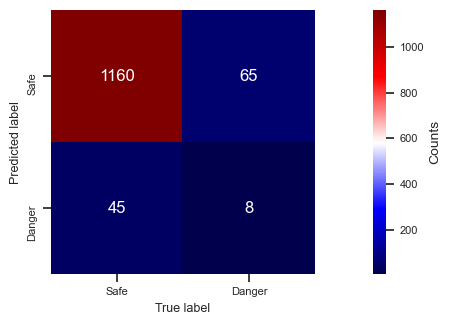

In [55]:
show_confusion_matrix(Y_test, Y_pred, ['Safe', 'Danger'])

### Notes at the end of this iteration :
I believe it does not make sense to go beyond this point without fixing the clear problem we have. The most important obsevation from the above results is lack of correctly classified within-risk patients. Our class is distribution is highly skewed, as the number of risk-free patients far outweigh the number of within risk patients. In our next iteration we should try and focus on fixing this glaring problem.

## Iteration 2:
To solve the above problem we will use class weights in this iteration, and we will be using some of the models used in the previous iteration with this change.

__Class weights__: Such that the models can prioritize the classification of within risk patients more. As it is clear that class weights matter for this dataset, we will not be using k-NN or AdaBoost classifier for our dataset, as it isn't possible to do with them.

As the within stroke risk represent only 5% of our dataset, it would make sense for us to use a weight of 1 for this class and a weight of 0.05 for the risk-free patients to get an accurate result. 

### Using Decision Trees with class weights

In [80]:
weights = {0 : 0.05, 1: 1}

Accuracy on training: 1.00
Accuracy on testing: 0.91
f1 score : 0.14285714285714285


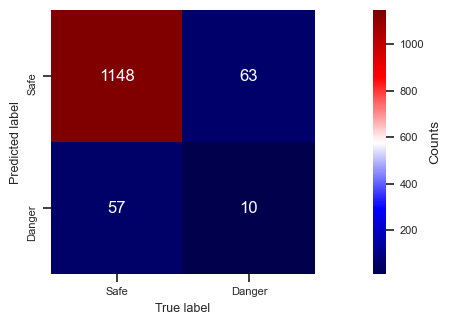

In [81]:
# Create Decision Tree classifer object
dt_classifier = tree.DecisionTreeClassifier( criterion = "entropy", class_weight = weights, random_state = 64)

dt = dt_classifier.fit(X_train, Y_train)


#Predict the response for train dataset
Y_pred_train = dt_classifier.predict(X_train)
accuracy = metrics.accuracy_score(Y_train, Y_pred_train)
print('Accuracy on training: {:.2f}'.format(accuracy))

#Predict the response for test dataset
Y_pred = dt_classifier.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy on testing: {:.2f}'.format(accuracy))

print("f1 score : " + str(f1_score(Y_test, Y_pred)))

show_confusion_matrix(Y_test, Y_pred, ['Safe', 'Danger'])

It seems there isn't much improvement in our classifier, as such we will try out different max_depth values to get the best result.

In [82]:
for i in range (1, 20, 4):
    # Create Decision Tree classifer object
    dt_classifier = tree.DecisionTreeClassifier( criterion = "entropy", class_weight = weights, 
                                                max_depth = i, random_state = 64)

    dt = dt_classifier.fit(X_train, Y_train)


    #Predict the response for train dataset
    Y_pred_train = dt_classifier.predict(X_train)
    accuracy = metrics.accuracy_score(Y_train, Y_pred_train)
    print('Accuracy on training: {:.2f} with max_depth: {}'.format(accuracy, i))

    #Predict the response for test dataset
    Y_pred = dt_classifier.predict(X_test)

    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print('Accuracy on testing: {:.2f}'.format(accuracy))

    print("f1 score : " + str(f1_score(Y_test, Y_pred)))


Accuracy on training: 0.72 with max_depth: 1
Accuracy on testing: 0.70
f1 score : 0.23715415019762842
Accuracy on training: 0.76 with max_depth: 5
Accuracy on testing: 0.73
f1 score : 0.22271714922049
Accuracy on training: 0.74 with max_depth: 9
Accuracy on testing: 0.69
f1 score : 0.15189873417721522
Accuracy on training: 0.86 with max_depth: 13
Accuracy on testing: 0.77
f1 score : 0.13569321533923304
Accuracy on training: 0.93 with max_depth: 17
Accuracy on testing: 0.84
f1 score : 0.11016949152542374


It seems with decisition trees, we need to focus on max_depth 1 to 5 to get the best results.

In [83]:
for i in range(1, 5):
    # Create Decision Tree classifer object
    dt_classifier = tree.DecisionTreeClassifier( criterion = "entropy", class_weight = weights, 
                                                max_depth = i, random_state = 64)

    dt = dt_classifier.fit(X_train, Y_train)


    #Predict the response for train dataset
    Y_pred_train = dt_classifier.predict(X_train)
    accuracy = metrics.accuracy_score(Y_train, Y_pred_train)
    print('Accuracy on training: {:.2f} with max_depth: {}'.format(accuracy, i))

    #Predict the response for test dataset
    Y_pred = dt_classifier.predict(X_test)

    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print('Accuracy on testing: {:.2f}'.format(accuracy))

    print("f1 score : " + str(f1_score(Y_test, Y_pred)))

Accuracy on training: 0.72 with max_depth: 1
Accuracy on testing: 0.70
f1 score : 0.23715415019762842
Accuracy on training: 0.72 with max_depth: 2
Accuracy on testing: 0.70
f1 score : 0.23715415019762842
Accuracy on training: 0.74 with max_depth: 3
Accuracy on testing: 0.71
f1 score : 0.24742268041237112
Accuracy on training: 0.75 with max_depth: 4
Accuracy on testing: 0.72
f1 score : 0.23504273504273504


It seems a max_depth of 3 yields the best results, let us look at its confusion matrix to see how well the sick patients are being classified.

There seems to be a lot of improvement over our last tries as the number of sick patients are being classified properly, but our accuracy still seems to be very poor.

### Using SVM with class weights

From our previous try we know that a sigmoid kernel is the optimum one, hence we will start with that one.

In [84]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='sigmoid', class_weight = weights) 

#Train the model using the training sets
svm_clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = svm_clf.predict(X_test)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("f1 score : {}".format(f1_score(Y_test, Y_pred)))
print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

f1 score : 0.15463917525773194
Accuracy SVM: 0.615


It seems if we try with a sigmoid kernel, our result does not seem to be that great. Let us try other parameters.

In [85]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear', class_weight = weights) 

#Train the model using the training sets
svm_clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = svm_clf.predict(X_test)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("f1 score : {}".format(f1_score(Y_test, Y_pred)))
print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

f1 score : 0.23665893271461713
Accuracy SVM: 0.743


In [86]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='rbf', class_weight = weights) 

#Train the model using the training sets
svm_clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = svm_clf.predict(X_test)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("f1 score : {}".format(f1_score(Y_test, Y_pred)))
print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

f1 score : 0.2434782608695652
Accuracy SVM: 0.728


It seems our score is improving, let us now look at the results from poly kernels

In [87]:
#Import svm model
from sklearn import svm

for i in range(2, 6):
    #Create a svm Classifier
    svm_clf = svm.SVC(kernel='poly', degree = i, class_weight = weights) # Linear Kernel

    #Train the model using the training sets
    svm_clf.fit(X_train, Y_train)

    #Predict the response for test dataset
    Y_pred = svm_clf.predict(X_test)
    
    # Model Accuracy: how often is the classifier correct?
    print("f1 score for {} degree: {}".format(i , str(f1_score(Y_test, Y_pred))))
    print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

f1 score for 2 degree: 0.17167381974248927
Accuracy SVM: 0.849
f1 score for 3 degree: 0.12578616352201258
Accuracy SVM: 0.891
f1 score for 4 degree: 0.08823529411764706
Accuracy SVM: 0.903
f1 score for 5 degree: 0.1076923076923077
Accuracy SVM: 0.909


Let us now plot a confusion matrix for the best SVM kernel, rbf and see how well it performs.

In [88]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='rbf', class_weight = weights) 

#Train the model using the training sets
svm_clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = svm_clf.predict(X_test)

# show_confusion_matrix(Y_test, Y_pred, ['Safe', 'Danger'])

# Model Accuracy: how often is the classifier correct?
print("f1 score : {}".format(f1_score(Y_test, Y_pred)))
print('Accuracy SVM: {:.3f}'.format(metrics.accuracy_score(Y_test, Y_pred)))

f1 score : 0.2434782608695652
Accuracy SVM: 0.728


It is clear from the results above that the model is still lacking as its scores are low, yet for now it seems to be our best one yet.

### Using Neurel Networks using class weights

Let us stary by importing the necessary modules and libraries

In [89]:
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten

from keras.utils import np_utils

As the we have 102 number of features, we will choose to have 5 different layers. After each layer, we will drop 20 percent of the features from previous layers, so we may not overfit the data (regularization)

In [90]:
MLP_model = Sequential()


MLP_model.add(Dense(20, input_dim=102, use_bias=True, 
                    activation='relu'))
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(15, use_bias=True, 
                    activation='relu')) 
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(10, use_bias=True, 
                    activation='sigmoid'))  
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(5, use_bias=True, 
                    activation='relu'))  
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(1, use_bias=True, 
                    activation='sigmoid'))  

Let us take a look at a summary of our NN model:

In [91]:
MLP_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                2060      
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 15)                315       
_________________________________________________________________
dropout_15 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                160       
_________________________________________________________________
dropout_16 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 5)                

The number of parameters required to learn seems to be too high but we will proceed anyway. 
Let us now compile our model, we will be using f1 as our metric as we have a problem of class imbalance, to do that we will first have to create a f1 score function.

In [92]:
# Got the code for the f1 function that can be used with keras from datascience exchange
# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))




In [93]:
MLP_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=["accuracy"])

Let us now train the model

In [94]:
learning_evolution = MLP_model.fit(X_train, Y_train, epochs=150, 
                                   batch_size=10, #shuffle=True,
                                   validation_split=0.25, class_weight = weights)

Epoch 1/150
288/288 [==============================] - 3s 4ms/step - loss: 0.0668 - accuracy: 0.3473 - val_loss: 0.6787 - val_accuracy: 0.4436
Epoch 2/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0572 - accuracy: 0.6647 - val_loss: 0.5834 - val_accuracy: 0.5992
Epoch 3/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0587 - accuracy: 0.7143 - val_loss: 0.5418 - val_accuracy: 0.6367
Epoch 4/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0573 - accuracy: 0.6643 - val_loss: 0.4848 - val_accuracy: 0.6983
Epoch 5/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0487 - accuracy: 0.7098 - val_loss: 0.4993 - val_accuracy: 0.6858
Epoch 6/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0495 - accuracy: 0.6873 - val_loss: 0.4955 - val_accuracy: 0.6910
Epoch 7/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0594 - accuracy: 0.6664 - val_loss: 0.5370 - val_accuracy: 0.6587

Epoch 58/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.8099 - val_loss: 0.4109 - val_accuracy: 0.7881
Epoch 59/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.7988 - val_loss: 0.4544 - val_accuracy: 0.7443
Epoch 60/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0406 - accuracy: 0.7761 - val_loss: 0.4519 - val_accuracy: 0.7537
Epoch 61/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0430 - accuracy: 0.8040 - val_loss: 0.4136 - val_accuracy: 0.7881
Epoch 62/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0336 - accuracy: 0.8089 - val_loss: 0.4977 - val_accuracy: 0.7422
Epoch 63/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.7854 - val_loss: 0.4694 - val_accuracy: 0.7474
Epoch 64/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.7878 - val_loss: 0.4255 - val_accuracy:

Epoch 115/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.8610 - val_loss: 0.4284 - val_accuracy: 0.8152
Epoch 116/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0284 - accuracy: 0.8435 - val_loss: 0.4253 - val_accuracy: 0.8121
Epoch 117/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0291 - accuracy: 0.8288 - val_loss: 0.4070 - val_accuracy: 0.8236
Epoch 118/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0307 - accuracy: 0.8368 - val_loss: 0.4570 - val_accuracy: 0.7735
Epoch 119/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0305 - accuracy: 0.8061 - val_loss: 0.4160 - val_accuracy: 0.8173
Epoch 120/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0290 - accuracy: 0.8415 - val_loss: 0.4009 - val_accuracy: 0.8278
Epoch 121/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0264 - accuracy: 0.8560 - val_loss: 0.4571 - val_ac

Let us now evaluate our Neurel Network model

In [95]:
loss, accuracy = MLP_model.evaluate(X_test, Y_test)
Y_pred = MLP_model.predict(X_test)
Y_pred = Y_pred >= 0.5
Y_pred = Y_pred * 1
print('Accuracy: {:.3f} - Loss {:.2f}'.format(accuracy, loss))
print("f1 test score: " + str(f1_score(Y_test, Y_pred)))

40/40 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.8005
Accuracy: 0.800 - Loss 0.49
f1 test score: 0.17475728155339806


The accuracy looks pretty bad compared to some of our previous models, hence we will try out some other neurel network models. We will start by trying with wider layers.

In [96]:
MLP_model = Sequential()


MLP_model.add(Dense(40, input_dim=102, use_bias=True, 
                    activation='relu'))
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(30, use_bias=True, 
                    activation='relu')) 
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(15, use_bias=True, 
                    activation='relu'))  
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(8, use_bias=True, 
                    activation='relu'))  
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(1, use_bias=True, 
                    activation='sigmoid'))  

In [97]:
MLP_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 40)                4120      
_________________________________________________________________
dropout_18 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 30)                1230      
_________________________________________________________________
dropout_19 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_20 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 8)                

In [98]:
MLP_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=["accuracy"])

In [99]:
learning_evolution = MLP_model.fit(X_train, Y_train, epochs=150, 
                                   batch_size=10, #shuffle=True,
                                   validation_split=0.25, class_weight = weights)

Epoch 1/150
288/288 [==============================] - 3s 4ms/step - loss: 0.0718 - accuracy: 0.5081 - val_loss: 0.5635 - val_accuracy: 0.6221
Epoch 2/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0566 - accuracy: 0.6088 - val_loss: 0.5345 - val_accuracy: 0.6566
Epoch 3/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.6655 - val_loss: 0.4954 - val_accuracy: 0.6681
Epoch 4/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.6936 - val_loss: 0.4568 - val_accuracy: 0.7203
Epoch 5/150
288/288 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.7194 - val_loss: 0.4155 - val_accuracy: 0.7390
Epoch 6/150
288/288 [==============================] - 1s 2ms/step - loss: 0.0527 - accuracy: 0.6963 - val_loss: 0.5015 - val_accuracy: 0.6973
Epoch 7/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.7119 - val_loss: 0.5031 - val_accuracy: 0.6921

Epoch 58/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.8130 - val_loss: 0.4754 - val_accuracy: 0.7944
Epoch 59/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0269 - accuracy: 0.8363 - val_loss: 0.5100 - val_accuracy: 0.7944
Epoch 60/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.8258 - val_loss: 0.5685 - val_accuracy: 0.7850
Epoch 61/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.7924 - val_loss: 0.5237 - val_accuracy: 0.7944
Epoch 62/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0251 - accuracy: 0.8390 - val_loss: 0.5342 - val_accuracy: 0.7745
Epoch 63/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.8053 - val_loss: 0.5660 - val_accuracy: 0.7860
Epoch 64/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.8196 - val_loss: 0.6276 - val_accuracy:

Epoch 115/150
288/288 [==============================] - 1s 3ms/step - loss: 0.0225 - accuracy: 0.8577 - val_loss: 0.7816 - val_accuracy: 0.8173
Epoch 116/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0206 - accuracy: 0.8556 - val_loss: 0.7814 - val_accuracy: 0.8257
Epoch 117/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.8637 - val_loss: 0.8047 - val_accuracy: 0.8246
Epoch 118/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0211 - accuracy: 0.8656 - val_loss: 0.8433 - val_accuracy: 0.8643
Epoch 119/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0189 - accuracy: 0.8936 - val_loss: 0.9160 - val_accuracy: 0.8288
Epoch 120/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0194 - accuracy: 0.8670 - val_loss: 0.9418 - val_accuracy: 0.8361
Epoch 121/150
288/288 [==============================] - 1s 4ms/step - loss: 0.0188 - accuracy: 0.8851 - val_loss: 0.9687 - val_ac

In [100]:
loss, accuracy = MLP_model.evaluate(X_test, Y_test)
Y_pred = MLP_model.predict(X_test)
Y_pred = Y_pred >= 0.5
Y_pred = Y_pred * 1
print('Accuracy: {:.3f} - Loss {:.2f}'.format(accuracy, loss))
print("f1 test score: " + str(f1_score(Y_test, Y_pred)))

40/40 [==============================] - 0s 2ms/step - loss: 1.0875 - accuracy: 0.8490
Accuracy: 0.849 - Loss 1.09
f1 test score: 0.19246861924686193


It seems there was no improvement, let us try out another Neurel Network with more layers

In [101]:
MLP_model = Sequential()


MLP_model.add(Dense(30, input_dim=102, use_bias=True, 
                    activation='relu'))
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(20, use_bias=True, 
                    activation='relu'))
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(15, use_bias=True, 
                    activation='relu')) 
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(10, use_bias=True, 
                    activation='sigmoid'))  
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(7, use_bias=True, 
                    activation='sigmoid'))  
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(5, use_bias=True, 
                    activation='relu'))  
MLP_model.add(Dropout(0.2))

MLP_model.add(Dense(1, use_bias=True, 
                    activation='relu'))  

In [102]:
MLP_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=["accuracy"])

In [103]:
learning_evolution = MLP_model.fit(X_train, Y_train, epochs=150, 
                                   batch_size=10, #shuffle=True,
                                   validation_split=0.25, class_weight = weights)

Epoch 1/150
288/288 [==============================] - 3s 6ms/step - loss: 0.7695 - accuracy: 0.9501 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 2/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7920 - accuracy: 0.9487 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 3/150
288/288 [==============================] - 1s 4ms/step - loss: 0.6868 - accuracy: 0.9555 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 4/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7355 - accuracy: 0.9523 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 5/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7499 - accuracy: 0.9514 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 6/150
288/288 [==============================] - 1s 4ms/step - loss: 0.8116 - accuracy: 0.9474 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 7/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7049 - accuracy: 0.9543 - val_loss: 0.5474 - val_accuracy: 0.9645

Epoch 58/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7345 - accuracy: 0.9524 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 59/150
288/288 [==============================] - 1s 4ms/step - loss: 0.8229 - accuracy: 0.9467 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 60/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7918 - accuracy: 0.9487 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 61/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7530 - accuracy: 0.9512 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 62/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7248 - accuracy: 0.9530 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 63/150
288/288 [==============================] - 1s 4ms/step - loss: 0.6753 - accuracy: 0.9562 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 64/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7808 - accuracy: 0.9494 - val_loss: 0.5474 - val_accuracy:

Epoch 115/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7295 - accuracy: 0.9527 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 116/150
288/288 [==============================] - 1s 4ms/step - loss: 0.8282 - accuracy: 0.9463 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 117/150
288/288 [==============================] - 1s 4ms/step - loss: 0.6962 - accuracy: 0.9549 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 118/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7429 - accuracy: 0.9518 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 119/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7901 - accuracy: 0.9488 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 120/150
288/288 [==============================] - 1s 4ms/step - loss: 0.7571 - accuracy: 0.9509 - val_loss: 0.5474 - val_accuracy: 0.9645
Epoch 121/150
288/288 [==============================] - 1s 4ms/step - loss: 0.9120 - accuracy: 0.9409 - val_loss: 0.5474 - val_ac

40/40 [==============================] - 0s 2ms/step - loss: 0.8811 - accuracy: 0.9429


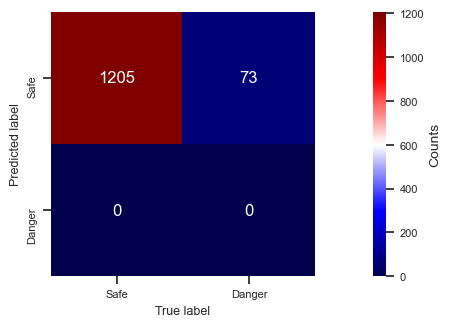

Accuracy: 0.943 - Loss 0.88
f1 test score: 0.0


In [104]:

loss, accuracy = MLP_model.evaluate(X_test, Y_test)
Y_pred = MLP_model.predict(X_test)

Y_pred = Y_pred >= 0.5
Y_pred = Y_pred * 1


show_confusion_matrix(Y_test, Y_pred, ['Safe', 'Danger'])

print('Accuracy: {:.3f} - Loss {:.2f}'.format(accuracy, loss))
print("f1 test score: " + str(f1_score(Y_test, Y_pred)))

The above confusion matrix shows how clearly bad our neurel network classifier is.

It seems that the neurel network can only go so far in accurately predicting a stroke. Furthermore, at this stage it should be clear that that class weights can only help us to a certain extent, as the best we have done so far is a f1 score of 24. We will now try out some other approaches.

## Iteration 3:

### We will now try out a mixture of under sampling and over sampling

As the classes are imbalanced, we will now modify them so they may become artifically balanced. We will increase the size of the within stroke risk to 1000 and decrease the risk-free, so the total number of rows become 2000

We will start by splitting the data into train and test samples

In [105]:
#split dataset in features and target variable / train & test
#
X_train, X_test, Y_train, Y_test = train_test_split(features, data_t,  
                                                    test_size=0.25, random_state=89) 

print("Training data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Training data shape: (3832, 102)
Test data shape: (1278, 102)


In [106]:
stroke = X_train[Y_train == 1]
stroke_over = pd.concat([stroke.sample(100), stroke.sample(100), stroke.sample(100)
                         , stroke.sample(100), stroke.sample(100), stroke.sample(100)
                         , stroke.sample(100), stroke.sample(100), stroke.sample(100)
                         , stroke.sample(100)])

non_stroke = X_train[Y_train == 0]
non_stroke_under = non_stroke.sample(1000)

artificial = pd.concat([stroke_over, non_stroke_under])
artificial

,0,1,2,3,5,6,10,11,14,15,...,163,164,179,180,181,182,183,184,185,187
69,0.972222,1.0,0.0,-0.521509,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.138889,1.0,0.0,2.049803,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.361111,0.0,0.0,2.658570,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,1.027778,1.0,1.0,-0.213190,1.0,-1.0,0.0,0.0,0.0,1.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,1.027778,0.0,0.0,-0.883838,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.083333,0.0,0.0,3.392455,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3070,0.333333,0.0,0.0,-0.284028,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1164,0.111111,0.0,0.0,-0.660470,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2054,-0.083333,0.0,0.0,0.434930,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will now create an artificial target series that we will use for training our model. As we know our dataframe's first thousand entries are within risk and last 1000 are risk-free. Hence our target series will reflect that.

In [107]:
target_list = [1]*1000 + [0]*1000
artificial_t = np.array(target_list)

Let us not train the best model we have so far, and that is the k-NN classifier

In [108]:
from sklearn.model_selection import cross_validate
kNN_models = list(range(1, 11))

# Will be used later for making boxplots:
cv_data = []

for i in kNN_models:

    classifier = learn_kNN_classifier(artificial, artificial_t, 
                                          i, "uniform")
    predictions, accuracy = get_predictions(artificial, 
                                                artificial_t, 
                                                classifier)
    
    cv_results = cross_validate(classifier, artificial, artificial_t, cv=10, 
                            return_train_score=True)
    
    cv_data.append(cv_results["test_score"])
#     print("Number of stroke patients detected: " + str(predictions.sum()))
#     print("Number of total stroke patients: " + str(data_t.sum()))
    print("f1 test score: " + str(f1_score(artificial_t, predictions)))
    

    print('Mean test score: {:.3f} (std: {:.3f}) for {} k-NN model'
      '\nMean train score: {:.3f} (std: {:.3f}) \n'.format(
                                              np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']), i,
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

f1 test score: 1.0
Mean test score: 0.926 (std: 0.018) for 1 k-NN model
Mean train score: 1.000 (std: 0.000) 

f1 test score: 0.9994997498749374
Mean test score: 0.923 (std: 0.018) for 2 k-NN model
Mean train score: 0.999 (std: 0.000) 

f1 test score: 0.9345182413470534
Mean test score: 0.871 (std: 0.021) for 3 k-NN model
Mean train score: 0.925 (std: 0.003) 

f1 test score: 0.9348335677449602
Mean test score: 0.865 (std: 0.023) for 4 k-NN model
Mean train score: 0.924 (std: 0.003) 

f1 test score: 0.8943598925693823
Mean test score: 0.836 (std: 0.030) for 5 k-NN model
Mean train score: 0.875 (std: 0.003) 

f1 test score: 0.89280868385346
Mean test score: 0.816 (std: 0.032) for 6 k-NN model
Mean train score: 0.871 (std: 0.003) 

f1 test score: 0.8655278142794569
Mean test score: 0.797 (std: 0.028) for 7 k-NN model
Mean train score: 0.839 (std: 0.004) 

f1 test score: 0.853625170998632
Mean test score: 0.796 (std: 0.027) for 8 k-NN model
Mean train score: 0.831 (std: 0.005) 

f1 test sc

It seems our best bet from the above results is k = 3, as it does not overfit but also has a decent f1 score. We will take a better look using a confusion matrix on the artificial dataset

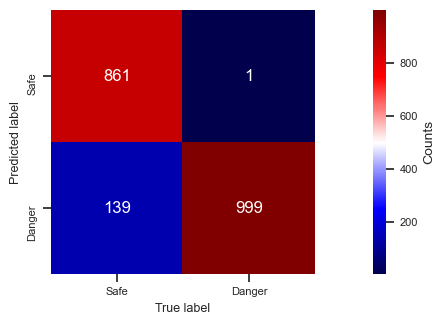

Overall accuracy score: 0.930
f1 test score: 0.9345182413470534


In [109]:
classifier = learn_kNN_classifier(artificial, artificial_t, 
                                          3, "uniform")
predictions, accuracy = get_predictions(artificial, 
                                            artificial_t, 
                                            classifier)

show_confusion_matrix(artificial_t, predictions, ['Safe', 'Danger'])
print("Overall accuracy score: {:.3f}".format(accuracy))
print("f1 test score: {}".format(f1_score(artificial_t, predictions)))

As expected, our model is doing a great job at classifying the samples. Moreover, that mistakes that it makes are misclassifying risk-free entries, which is definitely preferrable.

Let us now test our model on the test dataset to see how it really performs.

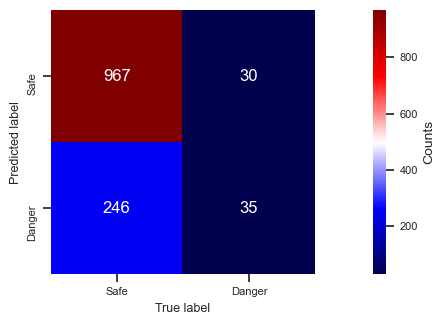

Overall accuracy score: 0.784
f1 test score: 0.20231213872832368


In [110]:
classifier = learn_kNN_classifier(artificial, artificial_t, 
                                          3, "uniform")
predictions, accuracy = get_predictions(X_test, 
                                            Y_test, 
                                            classifier)

show_confusion_matrix(Y_test, predictions, ['Safe', 'Danger'])
print("Overall accuracy score: {:.3f}".format(accuracy))
print("f1 test score: {}".format(f1_score(Y_test, predictions)))

It seems our model does a great job of classifying patients that are actually within risk. Risk free patients however can sometimes be classified. It should be noted however that classifying safe patients as within risk is a lot more preferrable than classifying within risk as safe. Hence, our model works.

### Using K-means to balance the classes

In this try we will try to solve the problem of class imbalance by reducing the amount of risk-free samples we have without losing a lot of data related to it, which will be done by using K-means to form a smaller number of clusters, whose centers will become a good representative of the surrounding data samples.

In [111]:
from sklearn.cluster import KMeans

Now we will split the train dataset into within stroke-risk and risk free.

In [112]:
stroke = features[data_t.iloc[:] == 1]
non_stroke = features[data_t.iloc[:] == 0]
stroke.shape

(249, 102)

We have 249 samples where the individuals are wihtin risk. Hence we will make 249 clusters using K-means on the rest of the train dataset (non_stroke).

In [113]:
n_clusters=249

kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(non_stroke)

# label each feature vector with a cluster identifier
labels = kmeans.labels_
print(labels[:50], '\n')

# coordinates of the cluster centers in the 102-dimensional feature space
centers = kmeans.cluster_centers_

[130 178 216  20 114 171  66 168  28 237 138 241 118 157  28  63 165  28
  23 242 184 195  23 221 170 104 243 213 247  81 105  92  59 149 162  94
 157 204  60  94 170  29  35  84  67   5 202 118 184  81] 



We will now train our k-NN model on the centers we got from the clustering. These centers will represent the entire non_stroke dataset. To train the model we will first concatenate the two datasets and create a new target series. As we know the first 192 are within risk and the last 192 are safe, it will be easy for us to create the target column.

In [114]:
stroke = stroke.values
stroke = pd.DataFrame(stroke)
centers_s = pd.DataFrame(centers)
artificial_f = pd.concat([stroke, centers_s])
# artificial_newf = artificial_new.round(decimals=3)

artificial_f

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.611111,0.0,1.000000e+00,3.712987,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0
1,0.444444,0.0,0.000000e+00,2.994300,0.0,0.0,1.0,0.0,0.000000e+00,0.000000e+00,...,-0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,0.972222,0.0,1.000000e+00,0.380920,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,-0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
3,0.111111,0.0,0.000000e+00,2.153481,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,0.944444,1.0,0.000000e+00,2.231917,0.0,0.0,1.0,0.0,0.000000e+00,0.000000e+00,...,-0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.618056,0.0,2.500000e-01,3.969195,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0
245,0.493056,0.0,0.000000e+00,3.291356,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0
246,0.597222,1.0,1.000000e+00,3.685710,0.0,0.0,0.0,0.0,0.000000e+00,1.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0
247,0.022222,0.0,-6.938894e-18,2.981979,0.2,-0.2,0.0,0.0,-5.551115e-17,-2.775558e-17,...,0.000000e+00,0.0,-5.551115e-17,0.0,0.0,0.0,-2.775558e-17,0.0,0.0,0.0


In [115]:
target_list = [1]*249 + [0]*249
targets_new = np.array(target_list)

Let us now train our k-NN model with this new dataset we have created.

In [116]:
from sklearn.model_selection import cross_validate
kNN_models = list(range(1, 20))

# Will be used later for making boxplots:
cv_data = []

for i in kNN_models:

    classifier = learn_kNN_classifier(artificial_f, targets_new, 
                                          i, "uniform")
    predictions, accuracy = get_predictions(artificial_f, 
                                                targets_new, 
                                                classifier)
    
    cv_results = cross_validate(classifier, artificial_f, targets_new, cv=10, 
                            return_train_score=True)
    
    cv_data.append(cv_results["test_score"])
#     print("Number of stroke patients detected: " + str(predictions.sum()))
#     print("Number of total stroke patients: " + str(data_t.sum()))
    print("f1 test score: " + str(f1_score(targets_new, predictions)))
    

    print('Mean test score: {:.3f} (std: {:.3f}) for {} k-NN model'
      '\nMean train score: {:.3f} (std: {:.3f}) \n'.format(
                                              np.mean(cv_results['test_score']),
                                              np.std(cv_results['test_score']), i,
                                              np.mean(cv_results['train_score']),
                                              np.std(cv_results['train_score'])))

f1 test score: 1.0
Mean test score: 0.468 (std: 0.076) for 1 k-NN model
Mean train score: 1.000 (std: 0.000) 

f1 test score: 0.5971830985915494
Mean test score: 0.480 (std: 0.073) for 2 k-NN model
Mean train score: 0.718 (std: 0.010) 

f1 test score: 0.7405940594059406
Mean test score: 0.594 (std: 0.047) for 3 k-NN model
Mean train score: 0.744 (std: 0.011) 

f1 test score: 0.662004662004662
Mean test score: 0.582 (std: 0.066) for 4 k-NN model
Mean train score: 0.713 (std: 0.013) 

f1 test score: 0.7444668008048291
Mean test score: 0.631 (std: 0.054) for 5 k-NN model
Mean train score: 0.751 (std: 0.007) 

f1 test score: 0.6697247706422018
Mean test score: 0.619 (std: 0.053) for 6 k-NN model
Mean train score: 0.719 (std: 0.014) 

f1 test score: 0.7389558232931727
Mean test score: 0.648 (std: 0.046) for 7 k-NN model
Mean train score: 0.740 (std: 0.010) 

f1 test score: 0.6845637583892619
Mean test score: 0.637 (std: 0.069) for 8 k-NN model
Mean train score: 0.726 (std: 0.013) 

f1 test 

It seems from the previous results that even though the f1 score was relatively high for all Ks, the mean test score seems to now be falling. Which is most likely due to the accuracy we're losing of the risk-free patients by creating all the clusters. For now the under and over sampling approach seems to still be the best. 

Let us take a look at a confusion matrix for the previous model:

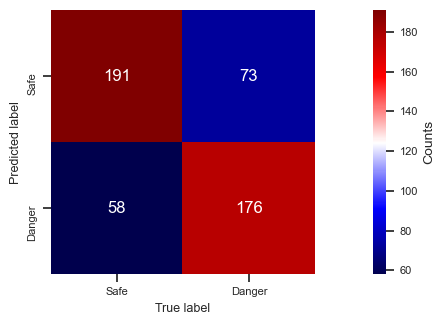

Overall accuracy score: 0.737
f1 test score: 0.7287784679089027


In [117]:
classifier = learn_kNN_classifier(artificial_f, targets_new, 
                                          15, "uniform")

predictions, accuracy = get_predictions(artificial_f, 
                                            targets_new, 
                                            classifier)

show_confusion_matrix(targets_new, predictions,  ['Safe', 'Danger'])
print("Overall accuracy score: {:.3f}".format(accuracy))
print("f1 test score: {}".format(f1_score(targets_new, predictions)))

This model is clearly even worse than the previous one as the model is struggling with the classification of the train samples, let alone samples that aren't part of it.

### Using manually bootstrapped datasets to solve class imbalance

We will first split the dataset into train and test

In [118]:
#split dataset in features and target variable / train & test
#
X_train, X_test, Y_train, Y_test = train_test_split(features, data_t,  
                                                    test_size=0.25, random_state=75) 

We will start by splitting the dataset into within risk and risk-free

In [119]:
stroke = X_train[Y_train.iloc[:] == 1]
non_stroke = X_train[Y_train.iloc[:] == 0]

In [120]:
print("Shape for stroke: {}".format(stroke.shape))
print("Shape for non_stroke: {}".format(non_stroke.shape))

Shape for stroke: (190, 102)
Shape for non_stroke: (3642, 102)


We will now split the non_stroke dataset into equal datasets with 190 rows

In [121]:
print("We will need a total of {} sets".format(3642//190))

We will need a total of 19 sets


In [122]:
split_list = []

for i in range(19):
    current = (non_stroke.iloc[190*i:190*(i+1)])
    split_list.append(pd.concat([stroke, current]))


Let us now create the target series.

In [123]:
target_list = [1]*190 + [0]*190
targets_new = np.array(target_list)

For this case we will once again be using a k-NN model as it has proven to be the most useful one. Furthermore, our previous tests have shown that k=3 seems to be best for predicting, hence we will use it. Let us now make our k-NN classifier.


We start by adding the 19 differently trained classifiers to our list.

In [124]:
classifier_list = []

for i in range(19):
    classifier = KNeighborsClassifier(n_neighbors = 3, weights = "uniform")
    classifier.fit(split_list[i], targets_new)
    classifier_list.append(classifier)
    

We then make a function that averages the results of those classifiers on a given dataset.

In [125]:
def results(dataFrame):
    prediction_list = []
    for i in range(19):
        current_prediction = (classifier_list[i]).predict(dataFrame)
        prediction_list.append(current_prediction)
        
    total = prediction_list[0]
    for i in prediction_list[1:]:
        total = total + i
    total = total / 19
    total = total >= 0.5
    total = total * 1
    return total
    

In [126]:
Y_predictions = results(X_test)

In [127]:
accuracy = metrics.accuracy_score(Y_test, Y_predictions)
f1 = f1_score(Y_test, Y_predictions)

In [128]:
accuracy = metrics.accuracy_score(Y_test, Y_predictions)
f1 = f1_score(Y_test, Y_predictions)

# show_confusion_matrix(Y_test, Y_predictions, ['Safe', 'Danger'])
print("Accuracy score : {:.3f}".format(accuracy))
print("f1 score : {:.3f}".format(f1))

Accuracy score : 0.690
f1 score : 0.175


It is clear from the results above that this method is still lacking as is has a relatively low f1 score. It is still however preferrable to some of the previous models as it is doing a decent job at finding the within risk samples.

# User Interface

In [129]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [130]:
from ipywidgets import interactive
from IPython.display import display

# Define any function
def a(Age):
    return Age

def b(BMI):
    return BMI

def ag(Avg_Level):
    return Avg_Level

def h1(Hypertension):
    return Hypertension

def h2(Cardiovascular):
    return Cardiovascular

def m1(Yes):
    return Yes
def m2(No):
    return No

def g(Govt_job):
    return Govt_job

def nv(Never_Worked):
    return Never_Worked

def p(Private):
    return Private

def se(Self_Employed):
    return Self_Employed

def c(Children):
    return Children

def rr(Rural):
    return Rural

def ru(Urban):
    return Urban

def un(Unknown):
    return Unknown

def fs(Formerly_Smoked):
    return Formerly_Smoked

def ns(Never_Smoked):
    return Never_Smoked

def s(Current_Smoker):
    return Current_Smoker

In [131]:
print("Please answer the following questions: \n\n")

print("Please enter your age")
age = interactive(a, Age = "")
display(age)

print("\nPlease enter your BMI(Body mass index)")
bmi = interactive(b, BMI = "")
display(bmi)

print("\nPlease enter you average glucose level :")
avg = interactive(ag, Avg_Level = "")
display(avg)

print("\nPlease check the type of disease you may have")
hyes = interactive(h1, Hypertension = False)
cyes = interactive(h2, Cardiovascular = False)

display(hyes)
display(cyes)

print("Are you married?")
myes = interactive(m1, Yes = False)
mno = interactive(m2, No = False)


display(myes)
display(mno)


print("Please select your work type: (choose only one)")
wg = interactive(g, Govt_job = False)
wnw = interactive(nv, Never_Worked = False)
wp = interactive(p, Private = False)
wse = interactive(se, Self_Employed = False)
wc = interactive(c, Children = False)

display(wg)
display(wnw)
display(wp)
display(wse)
display(wc)

print("Please enter your residence type: (choose only one)")
r = interactive(rr, Rural = False)
u = interactive(ru, Urban = False)

display(r)
display(u)

print("Please enter your smoking status: (choose only one)")
su = interactive(un, Unknown = False)
sfs = interactive(fs, Formerly_Smoked = False)
sns = interactive(ns, Never_Smoked = False)
ss = interactive(s, Current_Smoker = False)

display(su)
display(sfs)
display(sns)
display(ss)

print("\n Please scroll towards the end to view your answer")

Please answer the following questions: 


Please enter your age


interactive(children=(Text(value='', description='Age'), Output()), _dom_classes=('widget-interact',))


Please enter your BMI(Body mass index)


interactive(children=(Text(value='', description='BMI'), Output()), _dom_classes=('widget-interact',))


Please enter you average glucose level :


interactive(children=(Text(value='', description='Avg_Level'), Output()), _dom_classes=('widget-interact',))


Please check the type of disease you may have


interactive(children=(Checkbox(value=False, description='Hypertension'), Output()), _dom_classes=('widget-inte…

interactive(children=(Checkbox(value=False, description='Cardiovascular'), Output()), _dom_classes=('widget-in…

Are you married?


interactive(children=(Checkbox(value=False, description='Yes'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Checkbox(value=False, description='No'), Output()), _dom_classes=('widget-interact',))

Please select your work type: (choose only one)


interactive(children=(Checkbox(value=False, description='Govt_job'), Output()), _dom_classes=('widget-interact…

interactive(children=(Checkbox(value=False, description='Never_Worked'), Output()), _dom_classes=('widget-inte…

interactive(children=(Checkbox(value=False, description='Private'), Output()), _dom_classes=('widget-interact'…

interactive(children=(Checkbox(value=False, description='Self_Employed'), Output()), _dom_classes=('widget-int…

interactive(children=(Checkbox(value=False, description='Children'), Output()), _dom_classes=('widget-interact…

Please enter your residence type: (choose only one)


interactive(children=(Checkbox(value=False, description='Rural'), Output()), _dom_classes=('widget-interact',)…

interactive(children=(Checkbox(value=False, description='Urban'), Output()), _dom_classes=('widget-interact',)…

Please enter your smoking status: (choose only one)


interactive(children=(Checkbox(value=False, description='Unknown'), Output()), _dom_classes=('widget-interact'…

interactive(children=(Checkbox(value=False, description='Formerly_Smoked'), Output()), _dom_classes=('widget-i…

interactive(children=(Checkbox(value=False, description='Never_Smoked'), Output()), _dom_classes=('widget-inte…

interactive(children=(Checkbox(value=False, description='Current_Smoker'), Output()), _dom_classes=('widget-in…


 Please scroll towards the end to view your answer


In [132]:
age = int(age.children[0].value)
avg = int(avg.children[0].value)
bmi = int(bmi.children[0].value)

hyes = 1*(hyes.children[0].value)
cyes = 1*(cyes.children[0].value)

myes = 1*(myes.children[0].value)
mno = 1*(mno.children[0].value)

wg = 1*(wg.children[0].value)
wnw = 1*(wnw.children[0].value)
wp = 1*(wp.children[0].value)
wse = 1*(wse.children[0].value)
wc = 1*(wc.children[0].value)

r = 1*(r.children[0].value)
u = 1*(u.children[0].value)

su = 1*(su.children[0].value)
sfs = 1*(sfs.children[0].value)
sns = 1*(sns.children[0].value)
ss = 1*(ss.children[0].value)

In [133]:
# Three dummy zeros for the deleted gender column
user_set = np.array([age, hyes, cyes, avg, bmi, 0, 0, 0, mno, myes, 
                     wg, wnw, wp, wse, wc,
                     r, u, su, sfs, sns, ss])
user_set = user_set.reshape(1, 21)

In [134]:
user_sett = rs_scaler.transform(user_set)

user_sett = np.delete(user_sett, 5, axis = 1)
user_sett = np.delete(user_sett, 5, axis = 1)
user_sett = np.delete(user_sett, 5, axis = 1)


In [135]:
user_settp = poly.transform(user_sett)

In [136]:
user_settp.shape
user_settp = pd.DataFrame(user_settp)

In [137]:
user_settp = user_settp.drop(user_settp.columns[to_be_deleted], axis = 1)

In [138]:
user_settp#Create a svm Classifier
svm_clf = svm.SVC(kernel='rbf', class_weight = weights) 

#Train the model using the training sets
svm_clf.fit(features, data_t)



SVC(class_weight={0: 0.05, 1: 1})

In [139]:
#Predict the response for test dataset
Y_pred = svm_clf.predict(user_settp)

Y_pred

array([0], dtype=int64)

In [140]:
if (Y_pred[0] == 0):
    print("Congratulations! You seem to be safe. Try to keep it that way!")
elif (Y_pred[0] == 1):
    print("Please do not panic as the classifier is a bit inaccurate with this classification\nbut try to see a specialist as soon as possible.")
    

Congratulations! You seem to be safe. Try to keep it that way!
